# 1. Import required Libraries

In [1]:
# importing  libraries for general use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# to help with visualization
from matplotlib.pyplot import xticks
%matplotlib inline

In [3]:
# libraries for machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

In [4]:
# To perform Hierarchical clustering
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import linkage, cut_tree, dendrogram
from sklearn.metrics import silhouette_score

In [5]:
# Data display coustomization
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth',-1)

<ipython-input-5-0a4570d7bd13>:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth',-1)


In [6]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 2. Importing & Preprocessing the data

In [7]:
df=pd.read_excel("C:\Assignment_Excelr\Assignment 7_Clustering\EastWestAirlines.xlsx",sheet_name='data')

In [8]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [9]:
# Column rename
df= df.rename(columns={'ID#':'ID', 'Award?':'Award'})

In [10]:
df.tail()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


In [11]:
df.shape

(3999, 12)

In [12]:
df.size

47988

In [13]:
# it seems their are no null values in our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [14]:
# statistical info
df.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [15]:
# different cc_miles have different max values.
# so, we want to check what values these columns can take

unique_cc1 = df.cc1_miles.unique()
unique_cc2 = df.cc2_miles.unique()
unique_cc3 = df.cc3_miles.unique()

print(unique_cc1)
print(unique_cc2)
print(unique_cc3)

[1 4 3 2 5]
[1 2 3]
[1 3 2 4 5]


### Cleaning the data

In [16]:
# null count for columns

null_count_col = df.isnull().sum().value_counts(ascending=False)

# null percentage for columns

null_percent_col = (df.isnull().sum() * 100 / len(df)).value_counts(ascending=False)

print("Null Count for Columns:\n\n", null_count_col, "\n")
print("Null Percentage for Columns:\n\n", null_percent_col)

Null Count for Columns:

 0    12
dtype: int64 

Null Percentage for Columns:

 0.0    12
dtype: int64


In [17]:
# null count for rows

null_count_row = df.isnull().sum(axis=1).value_counts(ascending=False)

# null percentage for rows

null_percent_row = (df.isnull().sum(axis=1) * 100 / len(df)).value_counts(ascending=False)

print("Null Count for Rows:\n\n", null_count_row, "\n")
print("Null Percentage for Rows:\n\n", null_percent_row)

Null Count for Rows:

 0    3999
dtype: int64 

Null Percentage for Rows:

 0.0    3999
dtype: int64


# 3. EDA

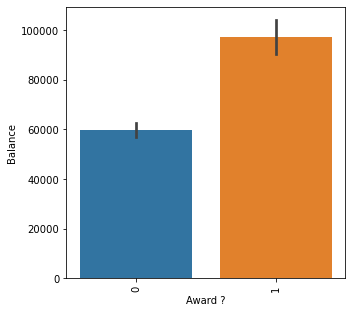

In [18]:
# Balance : Number of miles eligible for award travel

plt.figure(figsize = (5,5))
Balance = df[['Award','Balance']].sort_values('Balance', ascending = False)
ax = sns.barplot(x='Award', y='Balance', data= Balance)
ax.set(xlabel = 'Award ?', ylabel= 'Balance')
plt.xticks(rotation=90)
plt.show()

In [19]:
# what is correlated with Balance?

corr_matrix = df.corr()
corr_matrix["Balance"].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403487
cc1_miles            0.338344
Bonus_trans          0.324935
Days_since_enroll    0.263129
Flight_trans_12      0.255700
Flight_miles_12mo    0.217551
Award                0.178494
Qual_miles           0.108722
cc3_miles            0.035243
cc2_miles           -0.008804
ID                  -0.243737
Name: Balance, dtype: float64

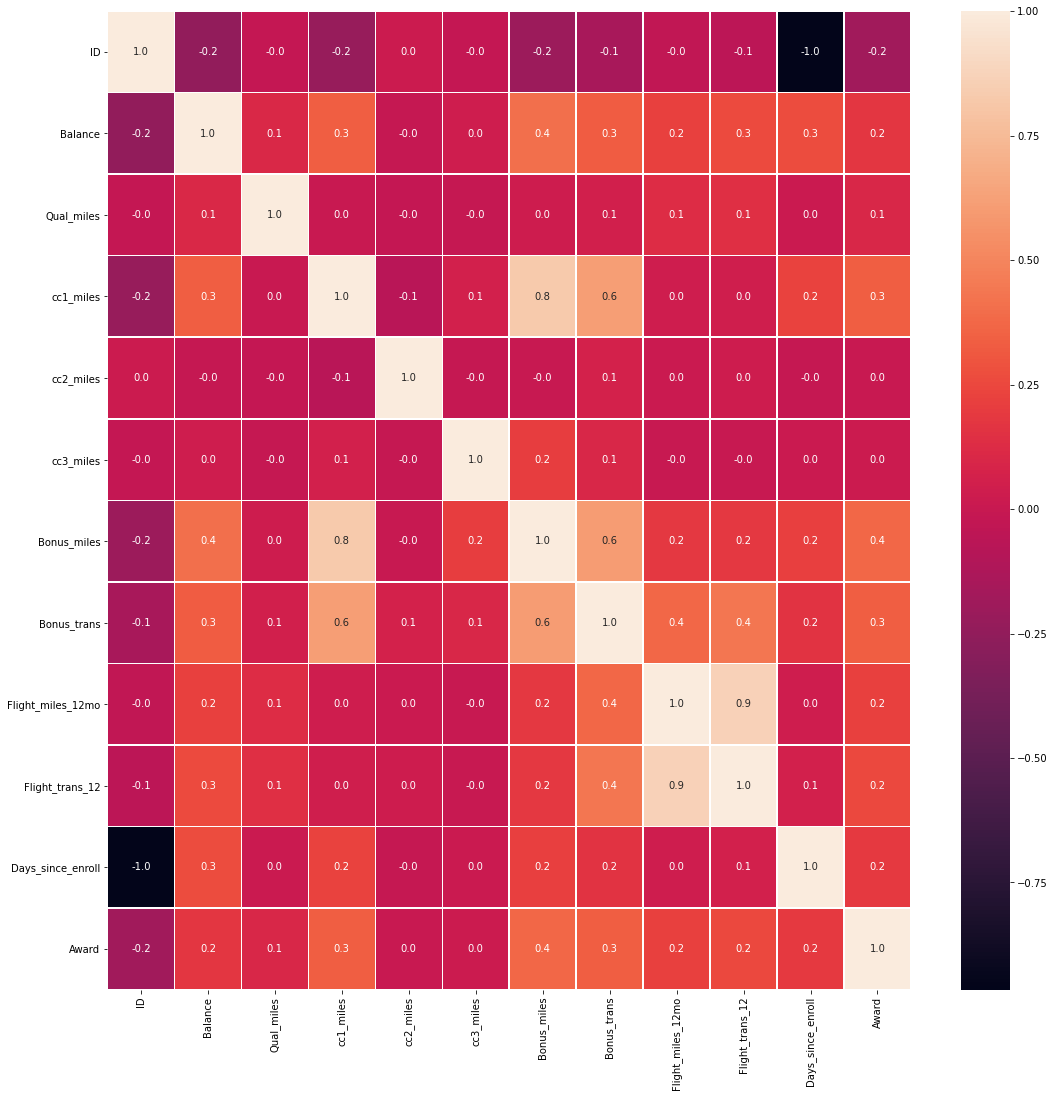

In [20]:
# correlation heatmap

f,ax = plt.subplots(figsize=(18,18))
sns.heatmap(df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

Unique points in this correlation matrix:

* ID# is negatively correlated with days_since_enroll

* flight_trans_12 is positively correlated with flight_miles_12mo

* bonus_trans is positively correlated with cc1_miles

* bonus_trans is positively correlated with bonus_miles

* bonus_miles is positively correlated with cc1_miles

In other words, the following are positively correlated

* Unique ID <-> Number of days since Enroll_date
* Number of flight transactions in the past 12 months <-> Number of flight miles in the past 12 months
* Miles passengers earn with the freq. flyer credit card <-> Amount of non-flight transactions
* Number of non-flight bonus transactions <-> Miles passengers earn from non-flight bonus transactions
* Miles passengers earn from non-flight bonus transactions <-> Miles passengers earn with the freq. flyer credit card

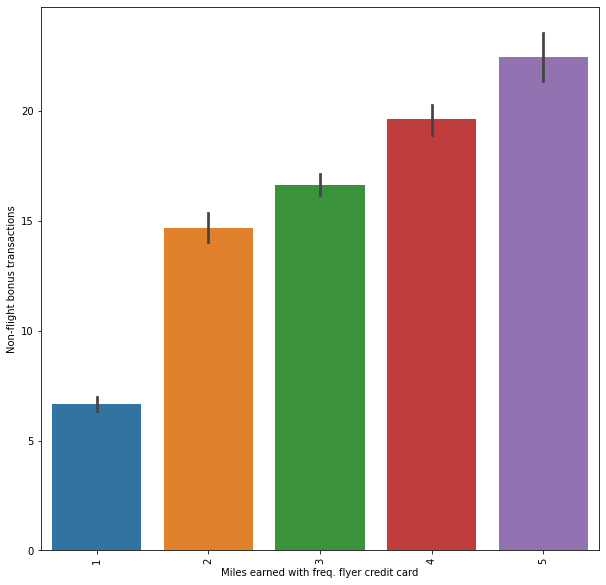

In [21]:
# Plotting frequent flying bonuses vs. non-flight bonus transactions 
plt.figure(figsize = (10,10))
sorted_data = df[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.xticks(rotation=90)
plt.show()

People who fly more frequently use bonus transactions more

ID


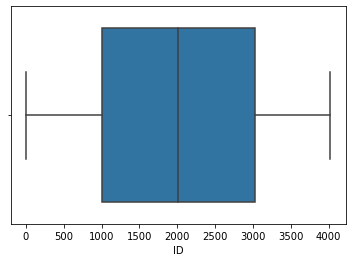

Balance


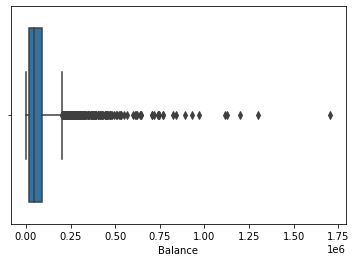

Qual_miles


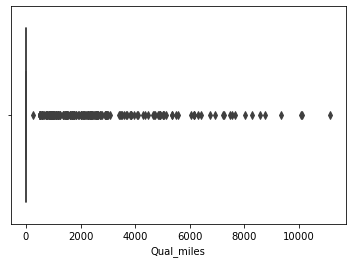

cc1_miles


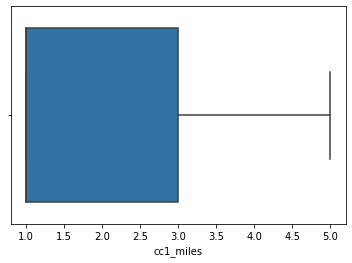

cc2_miles


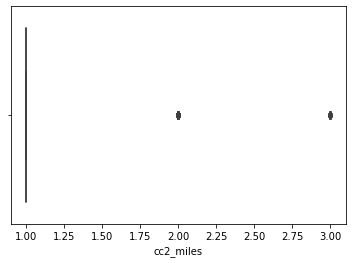

cc3_miles


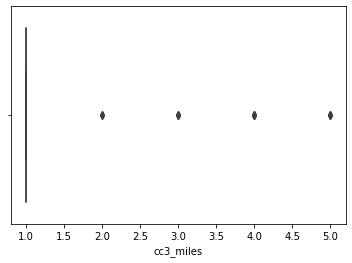

Bonus_miles


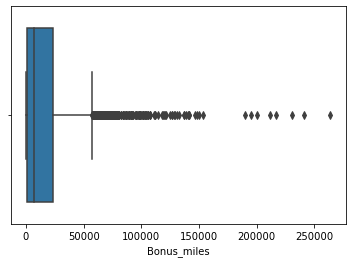

Bonus_trans


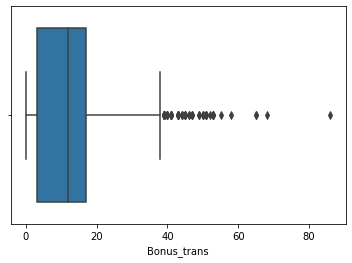

Flight_miles_12mo


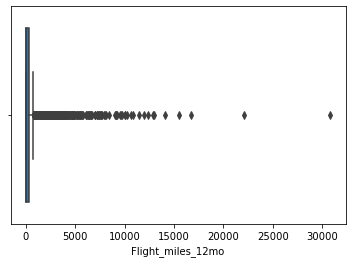

Flight_trans_12


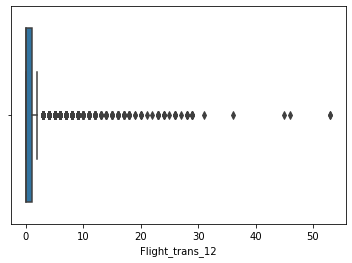

Days_since_enroll


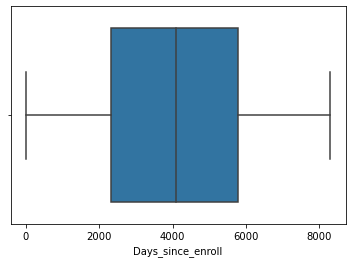

Award


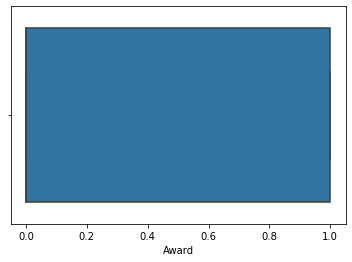

In [22]:
# Box Plot for every feature, singled out
    
for n in df.columns:
    print(n)
    sns.boxplot(df[n])
    plt.show()

## Outlier Analysis

<AxesSubplot:>

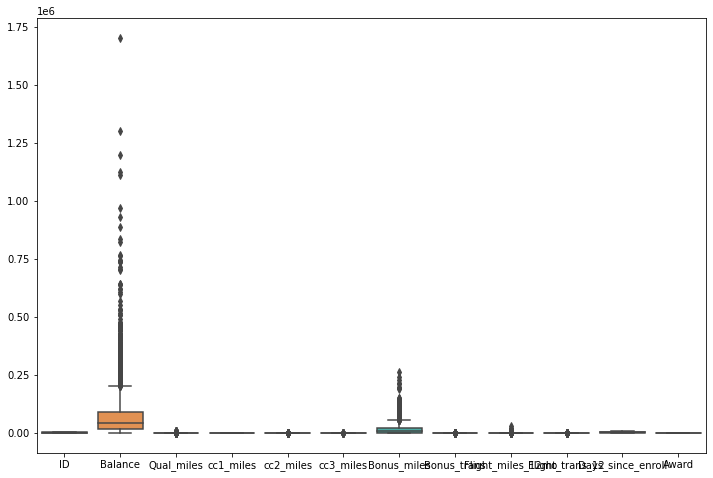

In [23]:
# Box plot for every feature in the same graph

plt.figure(figsize=(12,8))
sns.boxplot(data=df)

<AxesSubplot:>

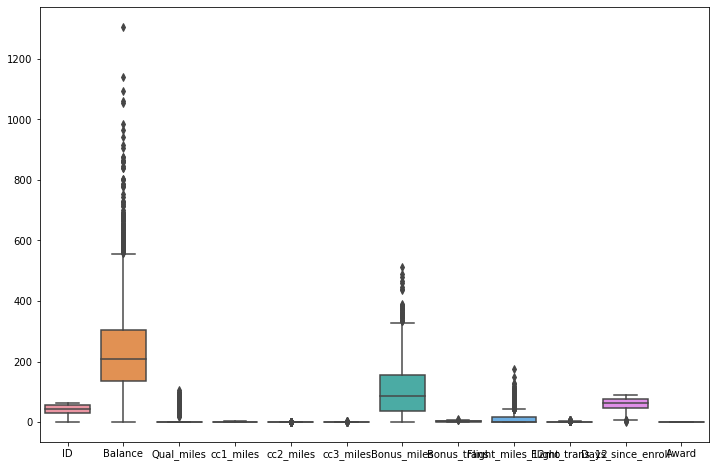

In [24]:
# we use sqrt() to see more clearly despite the outliers

plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(df))

### Removing the outlier from balance

In [25]:
q1 = df['Balance'].quantile(0.25)
q3 = df['Balance'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
df1 = df[(df['Balance']>ll)&(df['Balance']<ul)]

df1.head(100)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
105,108,3734,0,5,1,1,61096,18,150,2,6760,1
106,109,96627,1182,1,1,3,49059,26,2300,9,6738,1
107,110,43498,0,1,1,1,0,0,0,0,6759,1
108,111,84674,0,4,1,1,46335,14,50,1,6738,1


Even in this small sample, we can see that the last few lines of df1.head() are different, so removing the outliers seems to have worked.

<AxesSubplot:>

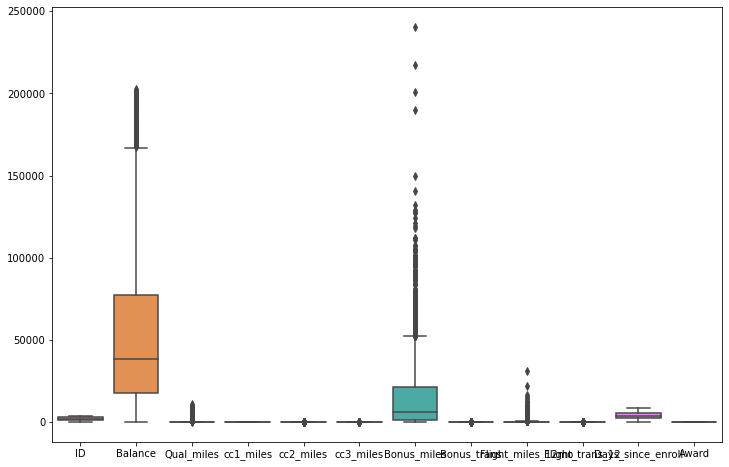

In [26]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df1)

In [27]:
df_shape = df.shape

df1_shape = df1.shape

print("shape of original dataframe:", df_shape, "\n")
print("shape of new dataframe:", df1_shape)

shape of original dataframe: (3999, 12) 

shape of new dataframe: (3733, 12)


### Removing the outlier from Bonus_miles

In [28]:
q1 = df['Bonus_miles'].quantile(0.25)
q3 = df['Bonus_miles'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
df2 = df1[(df1['Bonus_miles']>ll)&(df1['Bonus_miles']<ul)]

<AxesSubplot:>

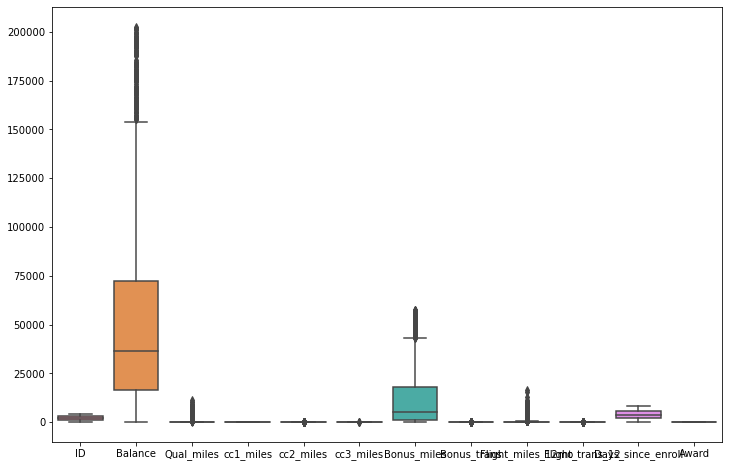

In [29]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df2)

### Removing the Outlier from Flight_miles_12mo

In [30]:
q1 = df['Flight_miles_12mo'].quantile(0.25)
q3 = df['Flight_miles_12mo'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
df3 = df2[(df2['Flight_miles_12mo']>ll)&(df2['Flight_miles_12mo']<ul)]

<AxesSubplot:>

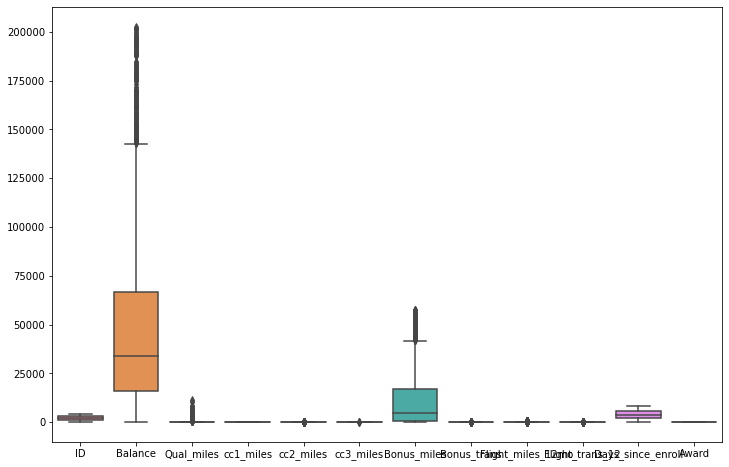

In [31]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df3)

### Removing Outliers from Qual_miles

In [32]:
q1 = df['Qual_miles'].quantile(0.25)
q3 = df['Qual_miles'].quantile(0.75)
iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)
df4 = df3[(df3['Qual_miles']>ll)&(df3['Qual_miles']<ul)]

<AxesSubplot:>

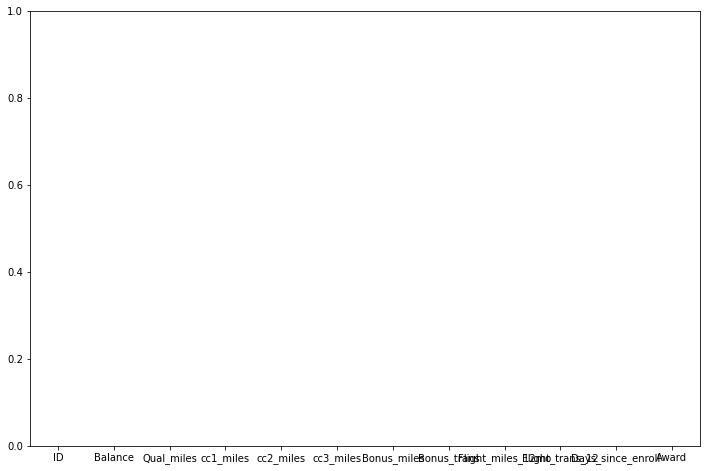

In [33]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df4)

<AxesSubplot:xlabel='Qual_miles'>

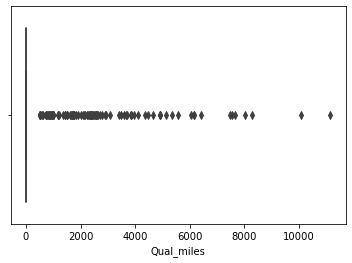

In [34]:
sns.boxplot(df3['Qual_miles'])

The amount of outliers Qual_miles has seems too many therefore too important, so we continue with df3.

In [35]:
df3.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0


## Finalizing the dataframe

In [36]:
# ID & award will not make much contribution during clutering. we will drop both columns.

dataset1 =  df3.drop(['ID','Award'], axis=1)
dataset1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
5,16420,0,1,1,1,0,0,0,0,6942


<AxesSubplot:>

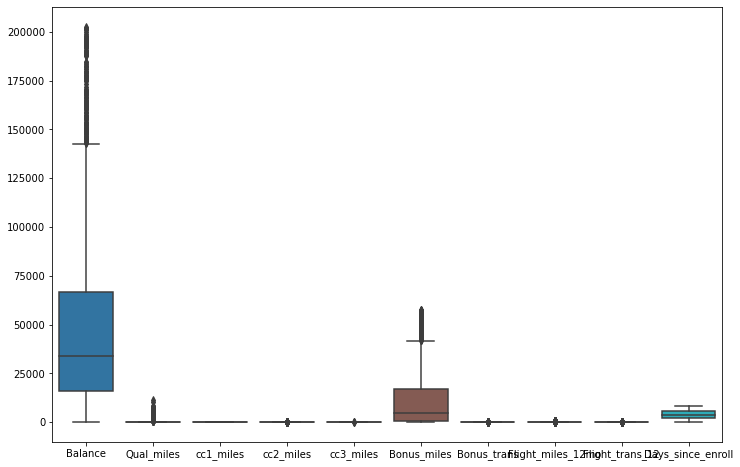

In [37]:
# our final boxgraphs with ID & Award removed

plt.figure(figsize=(12,8))
sns.boxplot(data=dataset1)

Balance


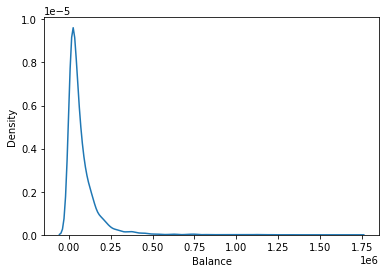

Qual_miles


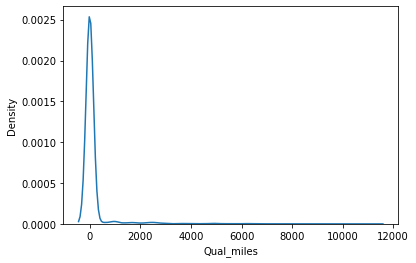

cc1_miles


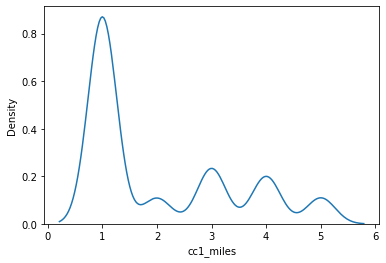

cc2_miles


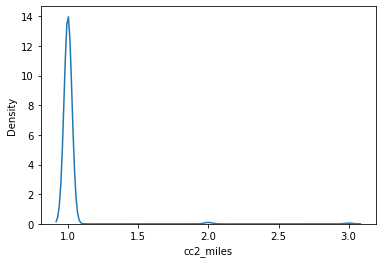

cc3_miles


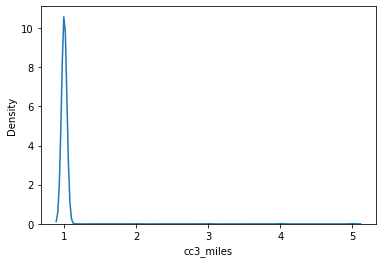

Bonus_miles


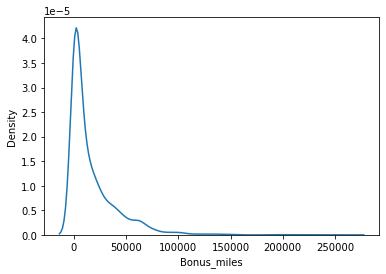

Bonus_trans


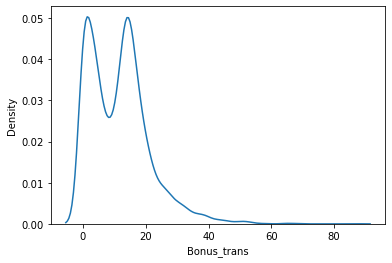

Flight_miles_12mo


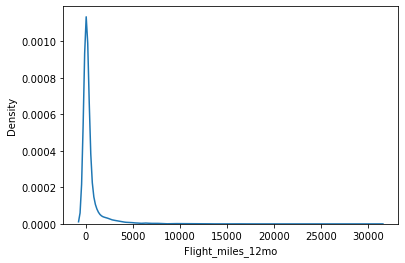

Flight_trans_12


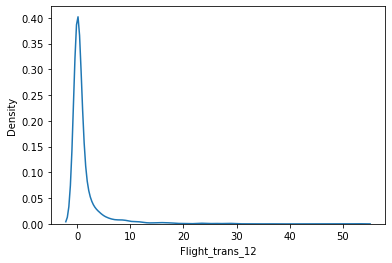

Days_since_enroll


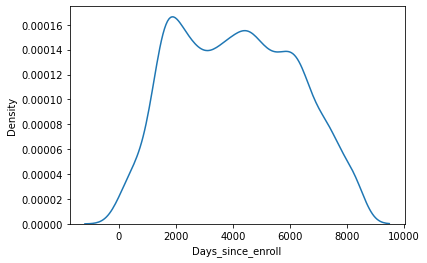

In [38]:
# Density for every feature, singled out

for n in dataset1.columns:
    print(n)
    sns.kdeplot(df[n])
    plt.show()

# 4. Modeling

## Normalizing the data

In [39]:
standard_scaler = StandardScaler()
df_norm = standard_scaler.fit_transform(dataset1)
df_norm.shape

(3105, 10)

In [40]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(df_norm)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})

In [41]:
clusters_df[0:20]

,num_clusters,cluster_errors
0,1,31050.000000
1,2,24457.689212
2,3,20678.263821
3,4,17960.821040
4,5,15888.898767
5,6,14537.350264
6,7,12003.808999
7,8,10958.298087
8,9,10073.421995
9,10,9559.474522


## Elbow method for determining the cluster value

Text(0, 0.5, 'Cluster Errors')

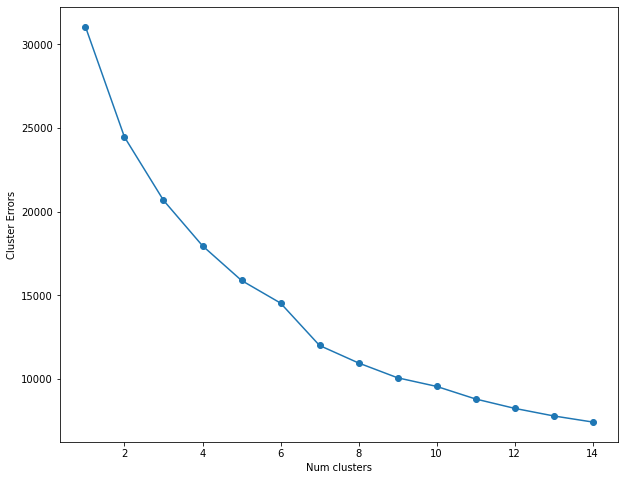

In [42]:
# Elbow plot, clusters vs. errors
plt.figure(figsize=(10,8))
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o')
plt.xlabel('Num clusters')
plt.ylabel('Cluster Errors')

The optimal number of clusters is 6, as seen from elbow curve.

## PCA & the Silhouette Method

### Running PCA of normalizing data

In [43]:
# applying PCA on std_df

# we consider 0.95 variance in n_components to not lose any data.

from sklearn.decomposition import PCA

pca_std = PCA(random_state=10, n_components=0.95)
pca_std_df = pca_std.fit_transform(df_norm)

In [44]:
# eigenvalues

print(pca_std.singular_values_)

[93.47111964 74.7912179  56.44863914 55.83228315 55.63692717 55.0128613
 44.8698796  37.59849223]


In [45]:
#  variance contained in each formed PCA

print(pca_std.explained_variance_ratio_*100)

[28.13800389 18.0152215  10.26231517 10.03943266  9.96930005  9.74690792
  6.4840776   4.55280714]


In [46]:
# Cummulative variance ratio

cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

array([28.13800389, 46.15322539, 56.41554056, 66.45497322, 76.42427326,
       86.17118118, 92.65525878, 97.20806592])

Applying PCA on standardized data with 95% variance gives 8 PCA components

### Running PCA of MinMaxscalar data.

In [47]:
# Using Minmaxscaler for accuracy result comparison

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(dataset1)
minmax_df.shape

(3105, 10)

In [48]:
# applying PCA on minmax_df

from sklearn.decomposition import PCA

pca_minmax =  PCA(random_state=10, n_components=0.95)
pca_minmax_df = pca_minmax.fit_transform(minmax_df)

In [49]:
# eigenvalues

print(pca_minmax.singular_values_)

[22.39660889 13.63099503 13.10616173  9.71410745  6.67146314  4.76875804]


In [50]:
# variance containing in each formed PCA

print(pca_minmax.explained_variance_ratio_*100)

[47.5446088  17.61131825 16.28125175  8.94422163  4.21870277  2.15549649]


Applying PCA on MinMaxscaler transformation data gives 6 PCA components

### The Sillhouette Method

In [51]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [52]:
#Import the KElbowVisualizer method
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

In [53]:
clust_list = [2,3,4,5,6,7,8,9]

In [54]:
#  Silhouette score for stadardized data with PCA applied.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_std_df)
    sil_score1= silhouette_score(pca_std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.32270805695021026
For n_clusters = 3 The average silhouette_score is : 0.3512845203919487
For n_clusters = 4 The average silhouette_score is : 0.3655663168762156
For n_clusters = 5 The average silhouette_score is : 0.3659427438169524
For n_clusters = 6 The average silhouette_score is : 0.375096572004536
For n_clusters = 7 The average silhouette_score is : 0.2878518208284501
For n_clusters = 8 The average silhouette_score is : 0.25757781606671487
For n_clusters = 9 The average silhouette_score is : 0.27114101985887634


In [55]:
# Silhouette score for MinMaxScalar transformation data with PCA Applied.

for n_clusters in clust_list:
    clusterer2 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels2 = clusterer1.fit_predict(pca_minmax_df)
    sil_score2= silhouette_score(pca_std_df, cluster_labels2)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score2)

For n_clusters = 2 The average silhouette_score is : 0.23479053568959424
For n_clusters = 3 The average silhouette_score is : 0.23479053568959424
For n_clusters = 4 The average silhouette_score is : 0.23479053568959424
For n_clusters = 5 The average silhouette_score is : 0.23479053568959424
For n_clusters = 6 The average silhouette_score is : 0.23479053568959424
For n_clusters = 7 The average silhouette_score is : 0.23479053568959424
For n_clusters = 8 The average silhouette_score is : 0.23479053568959424
For n_clusters = 9 The average silhouette_score is : 0.23479053568959424


### Conclusion:
According the the silhouette score of:

* The standardized data, the ideal number of clusters is 6, with a score higher than other options, of 0.37

* The MinMaxScalar transformation data, it is the same for any number of cluster, and is equal to 0.23 0.37 > 0.23, therefore we proceed with the standardized data with 6 clusters

# 5. Hierarchial Clustering

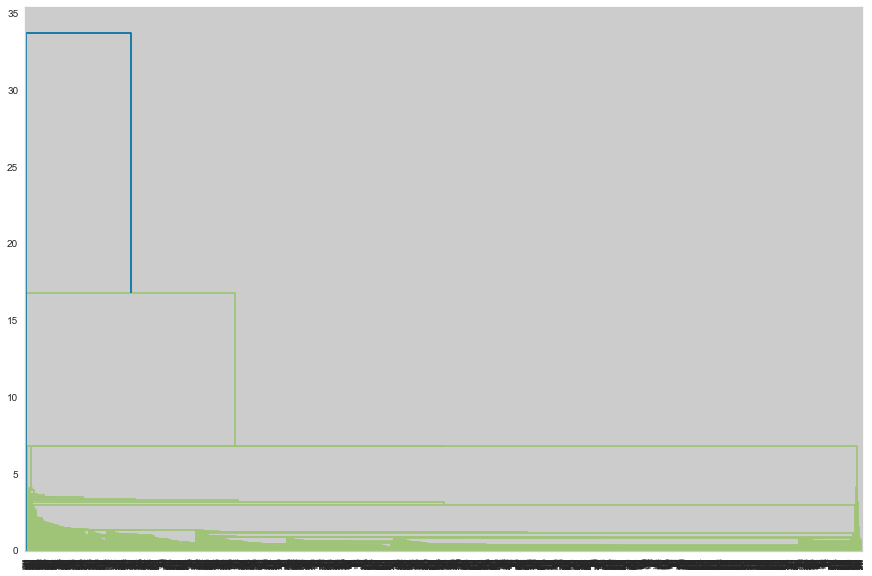

In [56]:
# Hierarchial Clustering with single linkage:

plt.figure(figsize=(15,10))
mergings = linkage(df_norm, method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

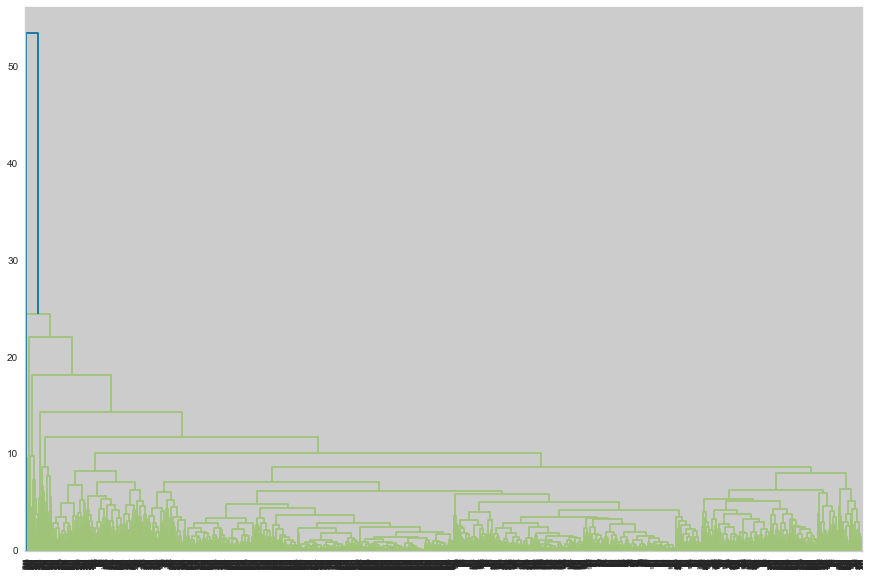

In [57]:
# Hierarchial Clustering with complete linkage as instructed:

plt.figure(figsize=(15,10))
mergings = linkage(df_norm, method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

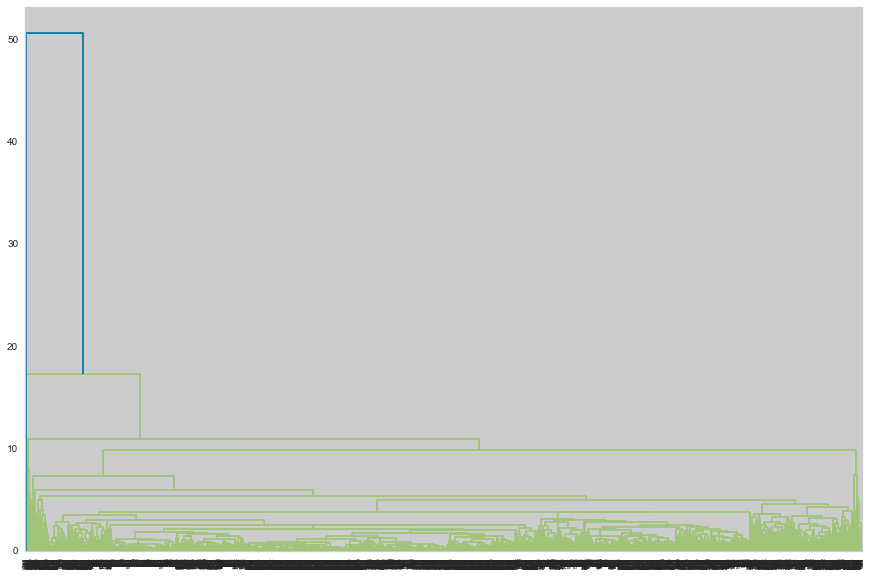

In [59]:
# Hierarchial Clustering with average linkage:

plt.figure(figsize=(15,10))
mergings = linkage(df_norm, method='average', metric='euclidean')
dendrogram(mergings)
plt.show()

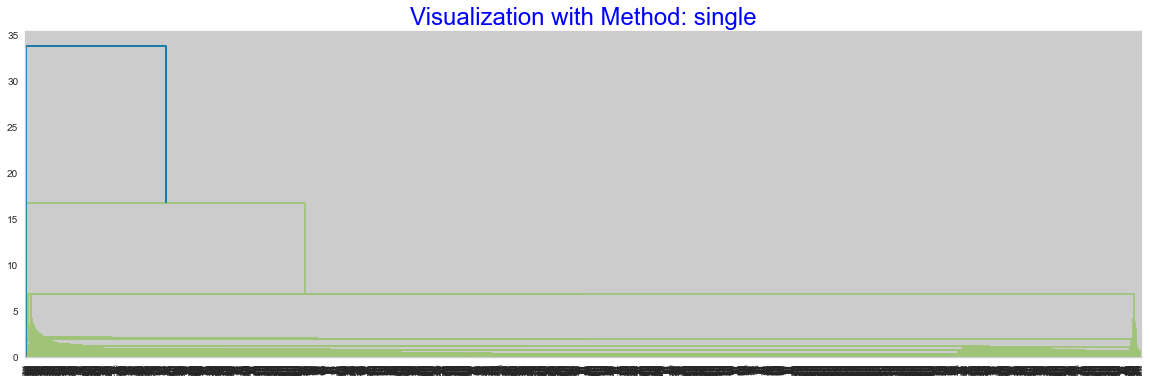

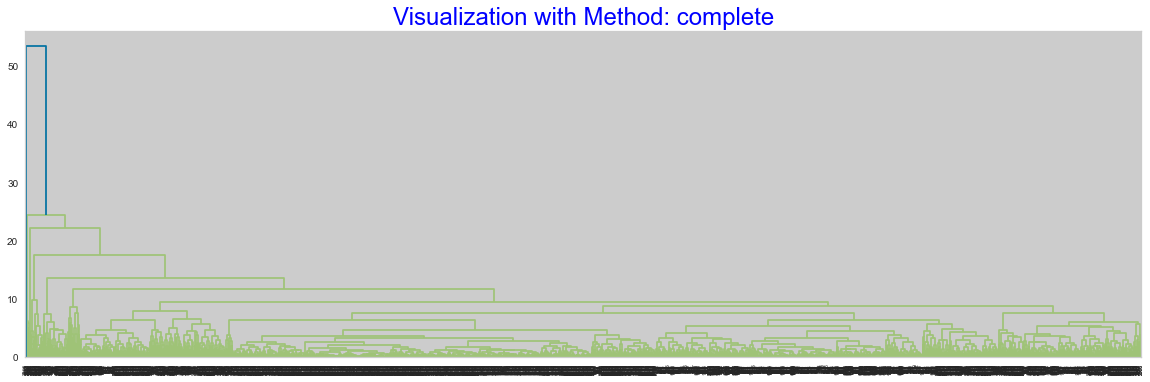

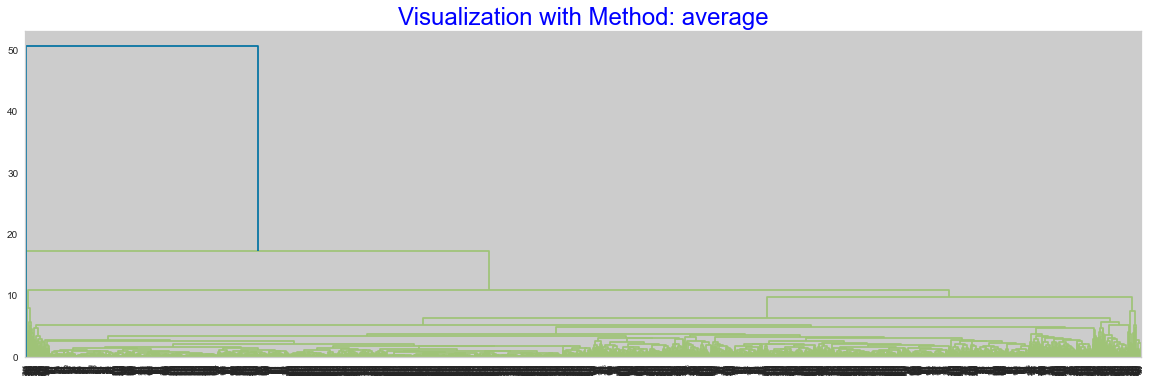

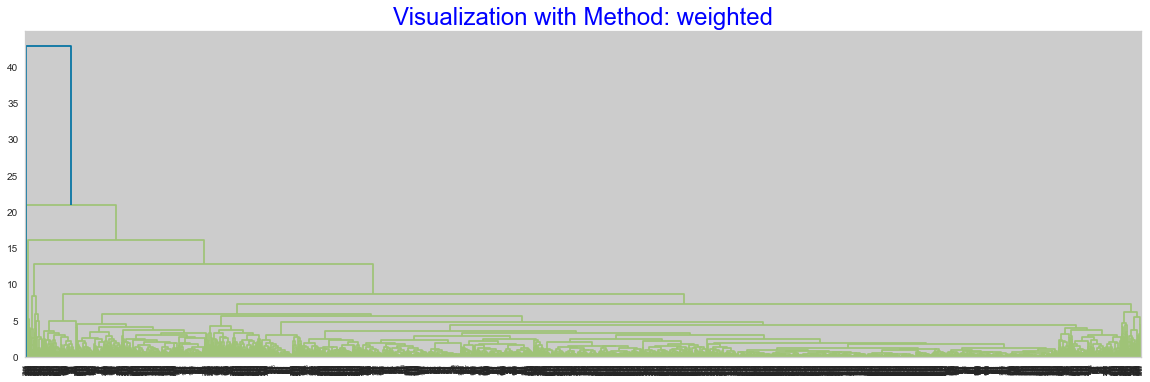

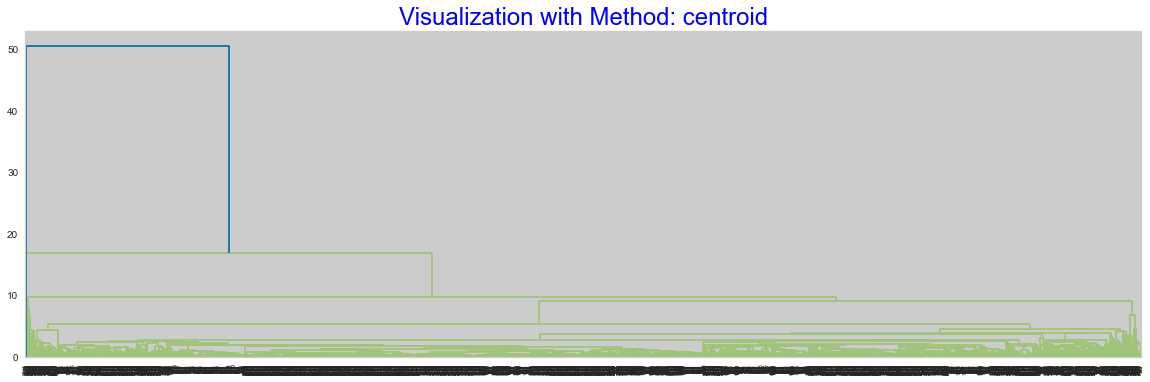

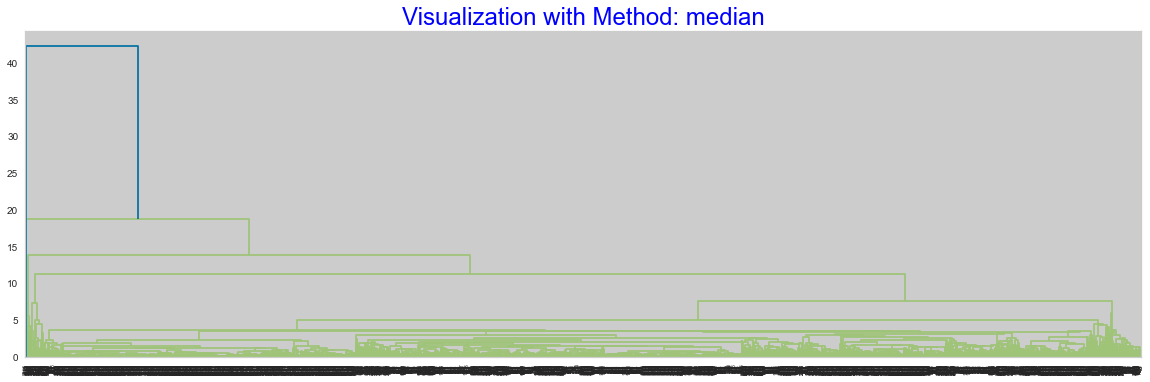

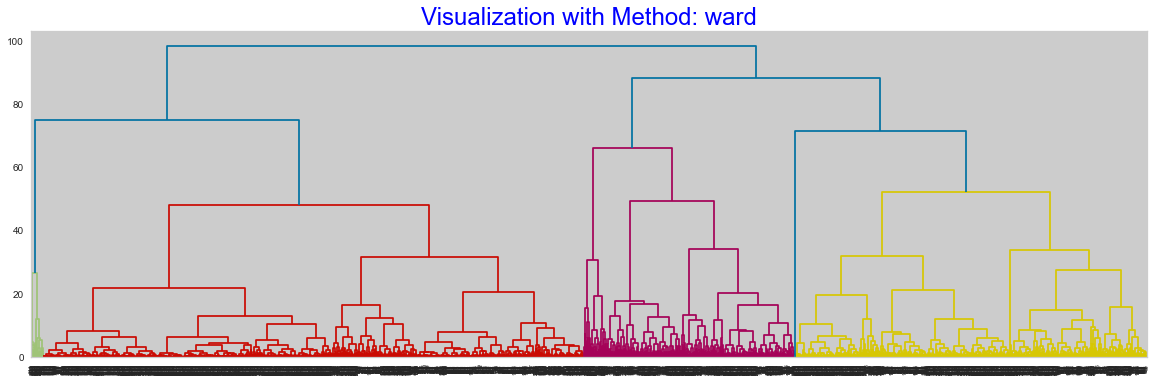

In [60]:
# Applying Dendrogram on PCA data using different linkage methods. 
# We can see number of clusters using color coding of dendrogram. Each color indicates one cluster.

import scipy.cluster.hierarchy as shc
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualization with Method: {}'.format(methods),fontdict = dict) 
    Dendrogram1 = shc.dendrogram(shc.linkage(pca_std_df, method = methods,optimal_ordering=False))

The seperation in Ward Method indicate that 6 is the optimal number for clusters.

## Agglomerative Clustering

In [61]:
agg_clustering = AgglomerativeClustering(n_clusters=6, linkage='average')
y_pred_hie = agg_clustering.fit_predict(pca_std_df)
print(y_pred_hie.shape)
y_pred_hie

(3105,)


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [62]:
print("Cluster labels for each point:", agg_clustering.labels_, "\n")
print("Number of leaves in the hierarchical tree:", agg_clustering.n_leaves_, "\n")
print("The estimated number of connected components in the graph:", agg_clustering.n_connected_components_, "\n")
print("The children of each non-leaf node:\n", agg_clustering.children_, "\n")
print("Clustering Score:", (silhouette_score(pca_std_df, agg_clustering.labels_)*100).round(3))

Cluster labels for each point: [1 1 1 ... 1 1 1] 

Number of leaves in the hierarchical tree: 3105 

The estimated number of connected components in the graph: 1 

The children of each non-leaf node:
 [[2552 2997]
 [ 832  923]
 [2057 2455]
 ...
 [6204 6205]
 [6178 6206]
 [2216 6207]] 

Clustering Score: 64.72


## Labeling Clusters

In [63]:
# Creating dataframe of cluster labels.

hie_cluster = pd.DataFrame(agg_clustering.labels_.copy(), columns=['Hie_Clustering'])

In [64]:
# Concating model1_Cluster df with main dataset copy

hie_df = pd.concat([dataset1.copy(), hie_cluster], axis=1)
hie_df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Hie_Clustering
0,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,1.0
1,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,1.0
2,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,1.0
3,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


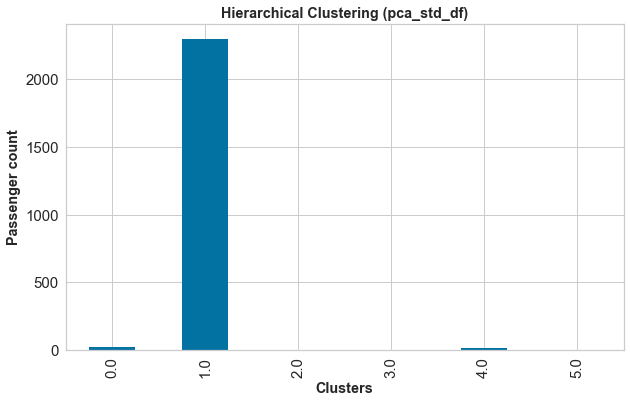

In [65]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
hie_df.groupby(['Hie_Clustering']).count()['Days_since_enroll'].plot(kind='bar')
plt.ylabel('Balance Labels')
plt.title('Hierarchical Clustering (pca_std_df)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('Passenger count', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [66]:
hie_df.groupby(['Hie_Clustering']).count()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Hie_Clustering,,,,,,,,,,
0.0,25,25,25,25,25,25,25,25,25,25
1.0,2295,2295,2295,2295,2295,2295,2295,2295,2295,2295
2.0,2,2,2,2,2,2,2,2,2,2
3.0,1,1,1,1,1,1,1,1,1,1
4.0,14,14,14,14,14,14,14,14,14,14
5.0,1,1,1,1,1,1,1,1,1,1


### Conclusion
As we have determined with the Dendograms, the color seperation in Ward Method indicate that 5 is the optimal number for clusters.

But, hierarchial clustering overall does not seem to do a really good job for the data we have, since all the passengers have been grouped in cluster 1. And it requires too much cpu. We will proceed with K means clustering.

# 6. K-means algorithm

In [67]:
model1 = KMeans(n_clusters = 5, max_iter=50)
model1.fit(pca_std_df)

KMeans(max_iter=50, n_clusters=5)

In [69]:
# analysis of clusters formed

dataset1.index = pd.RangeIndex(len(dataset1.index))
df_km = pd.concat([dataset1,pd.Series(model1.labels_)],axis=1)
df_km.columns = ["Balance", "Qual_miles", "cc1_miles", "cc2_miles",
                 "cc3_miles", "Bonus_miles", "Bonus_trans", "Flight_miles_12mo", 
                 "Flight_trans_12", "Days_since_enroll", "ClusterID"] 

In [70]:
df_km.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
ClusterID            0
dtype: int64

In [71]:
df_km

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,ClusterID
0,28143,0,1,1,1,174,1,0,0,7000,1
1,19244,0,1,1,1,215,2,0,0,6968,1
2,41354,0,1,1,1,4123,4,0,0,7034,1
3,14776,0,1,1,1,500,1,0,0,6952,1
4,16420,0,1,1,1,0,0,0,0,6942,1
...,...,...,...,...,...,...,...,...,...,...,...
3100,18476,0,1,1,1,8525,4,200,1,1403,1
3101,64385,0,1,1,1,981,5,0,0,1395,1
3102,73597,0,3,1,1,25447,8,0,0,1402,2
3103,54899,0,1,1,1,500,1,500,1,1401,0


In [72]:
dataset1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,16420,0,1,1,1,0,0,0,0,6942


In [73]:
km_cluster_Balance = pd.DataFrame(df_km.groupby('ClusterID')['Balance'].mean())
km_cluster_Qual_miles = pd.DataFrame(df_km.groupby('ClusterID')['Qual_miles'].mean())
km_cluster_cc1_miles = pd.DataFrame(df_km.groupby('ClusterID')['cc1_miles'].mean())
km_cluster_cc2_miles = pd.DataFrame(df_km.groupby('ClusterID')['cc2_miles'].mean())
km_cluster_cc3_miles = pd.DataFrame(df_km.groupby('ClusterID')['cc3_miles'].mean())
km_cluster_Bonus_miles = pd.DataFrame(df_km.groupby('ClusterID')['Bonus_miles'].mean())
km_cluster_Bonus_trans = pd.DataFrame(df_km.groupby('ClusterID')['Bonus_trans'].mean())
km_cluster_Flight_miles_12mo = pd.DataFrame(df_km.groupby('ClusterID')['Flight_miles_12mo'].mean())
km_cluster_Flight_trans_12 = pd.DataFrame(df_km.groupby('ClusterID')['Flight_trans_12'].mean())
km_cluster_Days_since_enroll = pd.DataFrame(df_km.groupby('ClusterID')['Days_since_enroll'].mean())


df = pd.concat([pd.Series([1,2,3,4,5]),
km_cluster_Balance,
km_cluster_Qual_miles,
km_cluster_cc1_miles,
km_cluster_cc2_miles,
km_cluster_cc3_miles,
km_cluster_Bonus_miles,
km_cluster_Bonus_trans,
km_cluster_Flight_miles_12mo,
km_cluster_Flight_trans_12,
km_cluster_Days_since_enroll],axis=1)
df.columns = ["ClusterID","Balance", "Qual_miles", "cc1_miles", "cc2_miles", "cc3_miles", "Bonus_miles",  "Bonus_trans", "Flight_miles_12mo", "Flight_trans_12", "Days_since_enroll"]
df

,ClusterID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,1,62806.534247,236.257534,1.660274,1.000000,1.000000,10146.912329,9.830137,475.578082,1.876712,3995.268493
1,2,29010.948718,61.899715,1.091168,1.000000,1.000000,2966.891738,5.549288,6.875783,0.047863,3590.458689
2,3,76515.718354,109.072785,3.255274,1.000000,1.000000,26246.257384,16.721519,32.517932,0.139241,4515.864979
3,4,40919.558824,0.000000,1.088235,2.323529,1.000000,12405.235294,14.647059,75.000000,0.382353,3827.235294
4,5,87737.333333,0.000000,2.000000,1.000000,2.666667,34841.666667,14.333333,0.000000,0.000000,4329.333333


### Analyzing cluster

<AxesSubplot:xlabel='ClusterID', ylabel='Balance'>

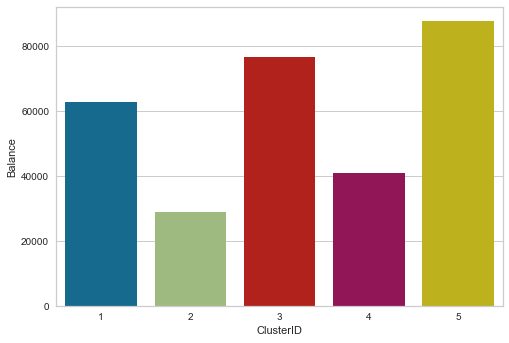

In [74]:
sns.barplot(data=df,x='ClusterID',y='Balance')

<AxesSubplot:xlabel='ClusterID', ylabel='Qual_miles'>

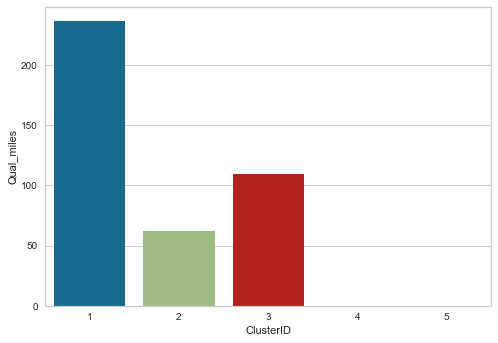

In [75]:
sns.barplot(data=df,x='ClusterID',y='Qual_miles')

<AxesSubplot:xlabel='ClusterID', ylabel='cc1_miles'>

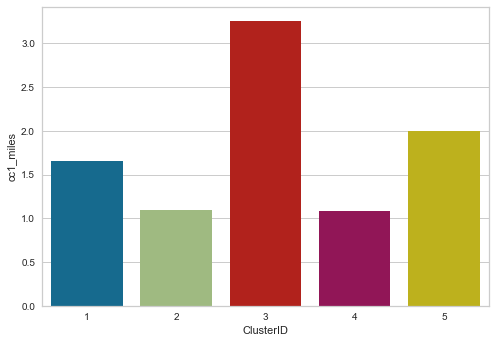

In [76]:
sns.barplot(data=df,x='ClusterID',y='cc1_miles')

<AxesSubplot:xlabel='ClusterID', ylabel='cc2_miles'>

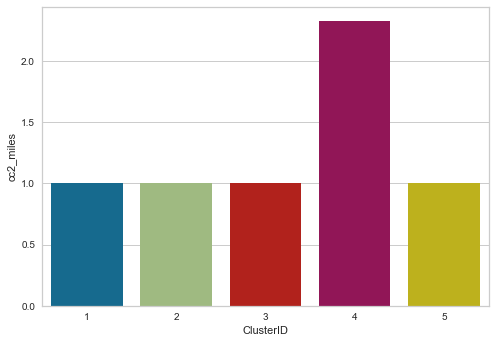

In [77]:
sns.barplot(data=df,x='ClusterID',y='cc2_miles')

<AxesSubplot:xlabel='ClusterID', ylabel='cc3_miles'>

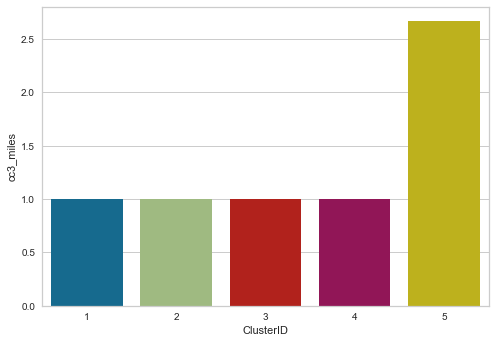

In [78]:
sns.barplot(data=df,x='ClusterID',y='cc3_miles')

<AxesSubplot:xlabel='ClusterID', ylabel='Bonus_miles'>

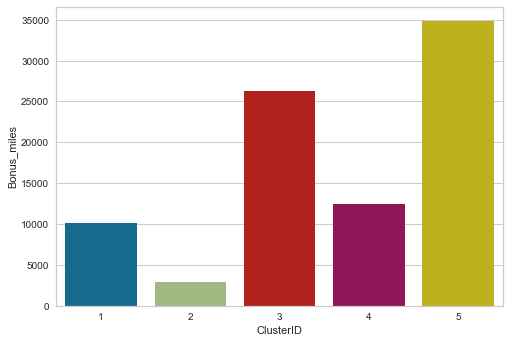

In [79]:
sns.barplot(data=df,x='ClusterID',y='Bonus_miles')

<AxesSubplot:xlabel='ClusterID', ylabel='Bonus_trans'>

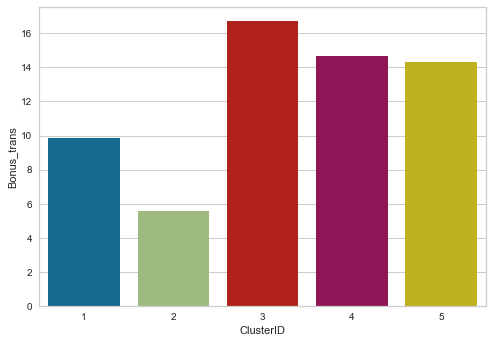

In [80]:
sns.barplot(data=df,x='ClusterID',y='Bonus_trans')

<AxesSubplot:xlabel='ClusterID', ylabel='Flight_miles_12mo'>

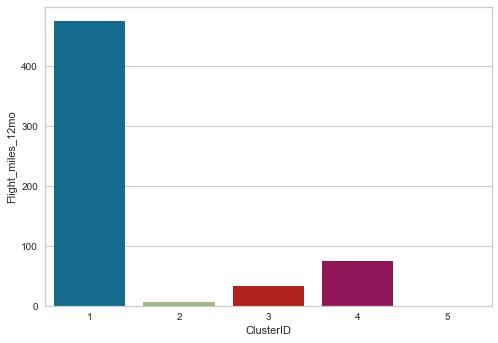

In [81]:
sns.barplot(data=df,x='ClusterID',y='Flight_miles_12mo')

<AxesSubplot:xlabel='ClusterID', ylabel='Flight_trans_12'>

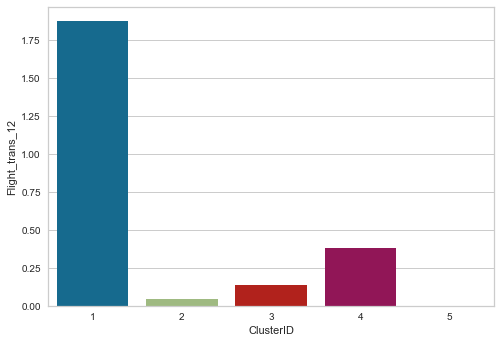

In [82]:
sns.barplot(data=df,x='ClusterID',y='Flight_trans_12')

<AxesSubplot:xlabel='ClusterID', ylabel='Days_since_enroll'>

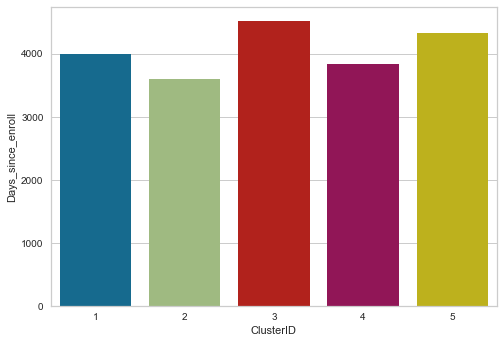

In [83]:
sns.barplot(data=df,x='ClusterID',y='Days_since_enroll')

In [84]:
df.columns

Index(['ClusterID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles',
       'cc3_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo',
       'Flight_trans_12', 'Days_since_enroll'],
      dtype='object')

In [85]:
model1_cluster = pd.DataFrame(model1.labels_.copy(), columns=['Kmeans_Clustering'])

In [93]:
Kmeans_df = pd.concat([dataset1.copy(), model1_cluster], axis=1)
Kmeans_df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Kmeans_Clustering
0,28143,0,1,1,1,174,1,0,0,7000,1
1,19244,0,1,1,1,215,2,0,0,6968,1
2,41354,0,1,1,1,4123,4,0,0,7034,1
3,14776,0,1,1,1,500,1,0,0,6952,1
4,16420,0,1,1,1,0,0,0,0,6942,1


In [95]:
Kmeans_df.tail()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Kmeans_Clustering
3100,18476,0,1,1,1,8525,4,200,1,1403,1
3101,64385,0,1,1,1,981,5,0,0,1395,1
3102,73597,0,3,1,1,25447,8,0,0,1402,2
3103,54899,0,1,1,1,500,1,500,1,1401,0
3104,3016,0,1,1,1,0,0,0,0,1398,1


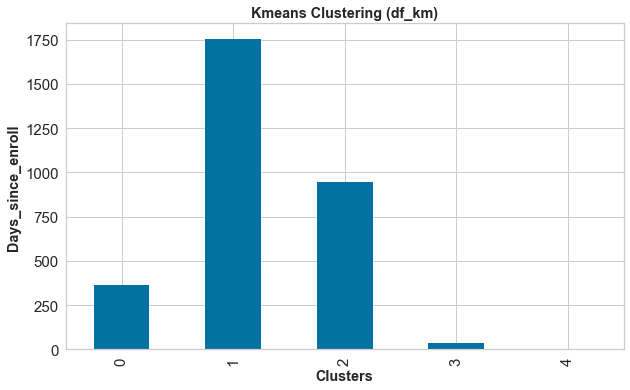

In [87]:
fig, ax = plt.subplots(figsize=(10, 6))
Kmeans_df.groupby(['Kmeans_Clustering']).count()['Days_since_enroll'].plot(kind='bar')
plt.ylabel('Days_since_enroll')
plt.title('Kmeans Clustering (df_km)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('Days_since_enroll', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

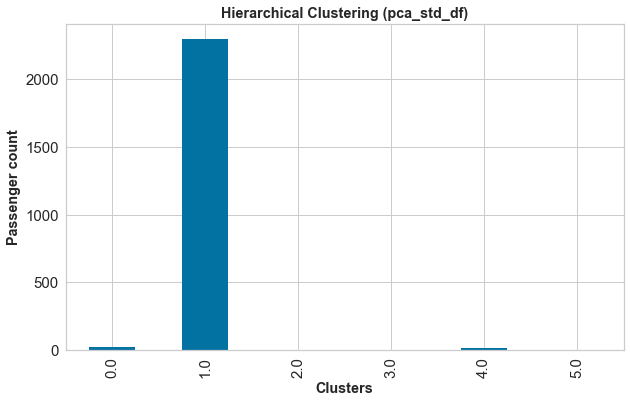

In [88]:
# Comparing this with our Hierarchial Clustering Bar plot:

fig, ax = plt.subplots(figsize=(10, 6))
hie_df.groupby(['Hie_Clustering']).count()['Days_since_enroll'].plot(kind='bar')
plt.ylabel('Balance Labels')
plt.title('Hierarchical Clustering (pca_std_df)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('Passenger count', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

# 7. DBSCAN Clustering

In [124]:
model2_cluster = DBSCAN(eps=0.30, min_samples=9)
model2_cluster.fit_predict(df.iloc[:,:13])

array([-1, -1, -1, -1, -1], dtype=int64)

In [125]:
model2_cluster = pd.DataFrame(model1.labels_.copy(), columns=['DBSCAN'])

In [126]:
dbscan_df = pd.concat([dataset1.copy(), model2_cluster], axis=1)
dbscan_df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,DBSCAN
0,28143,0,1,1,1,174,1,0,0,7000,1
1,19244,0,1,1,1,215,2,0,0,6968,1
2,41354,0,1,1,1,4123,4,0,0,7034,1
3,14776,0,1,1,1,500,1,0,0,6952,1
4,16420,0,1,1,1,0,0,0,0,6942,1


In [127]:
dbscan_df.tail()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,DBSCAN
3100,18476,0,1,1,1,8525,4,200,1,1403,1
3101,64385,0,1,1,1,981,5,0,0,1395,1
3102,73597,0,3,1,1,25447,8,0,0,1402,2
3103,54899,0,1,1,1,500,1,500,1,1401,0
3104,3016,0,1,1,1,0,0,0,0,1398,1


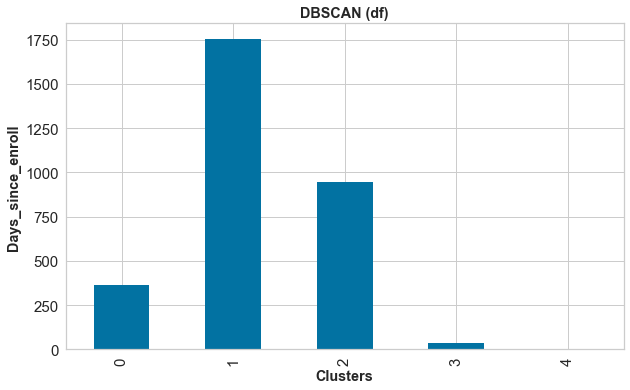

In [129]:
fig, ax = plt.subplots(figsize=(10, 6))
dbscan_df.groupby(['DBSCAN']).count()['Days_since_enroll'].plot(kind='bar')
plt.ylabel('Days_since_enroll')
plt.title('DBSCAN (df)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('Days_since_enroll', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

### Conclusion
K Means seems to be more successful in division of clusters

In [131]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==0].mean(),columns= ['Cluster_1_avg'])
cluster2 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==1].mean(),columns= ['Cluster_2_avg'])
cluster3 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==2].mean(),columns= ['Cluster_3_avg'])
cluster4 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==3].mean(),columns= ['Cluster_4_avg'])
cluster5 = pd.DataFrame(Kmeans_df.loc[Kmeans_df.Kmeans_Clustering==4].mean(),columns= ['Cluster_5_avg'])

In [132]:
avg_df = pd.concat([cluster1,cluster2,cluster3,cluster4,cluster5],axis=1)
avg_df

,Cluster_1_avg,Cluster_2_avg,Cluster_3_avg,Cluster_4_avg,Cluster_5_avg
Balance,62806.534247,29010.948718,76515.718354,40919.558824,87737.333333
Qual_miles,236.257534,61.899715,109.072785,0.000000,0.000000
cc1_miles,1.660274,1.091168,3.255274,1.088235,2.000000
cc2_miles,1.000000,1.000000,1.000000,2.323529,1.000000
cc3_miles,1.000000,1.000000,1.000000,1.000000,2.666667
Bonus_miles,10146.912329,2966.891738,26246.257384,12405.235294,34841.666667
Bonus_trans,9.830137,5.549288,16.721519,14.647059,14.333333
Flight_miles_12mo,475.578082,6.875783,32.517932,75.000000,0.000000
Flight_trans_12,1.876712,0.047863,0.139241,0.382353,0.000000
Days_since_enroll,3995.268493,3590.458689,4515.864979,3827.235294,4329.333333


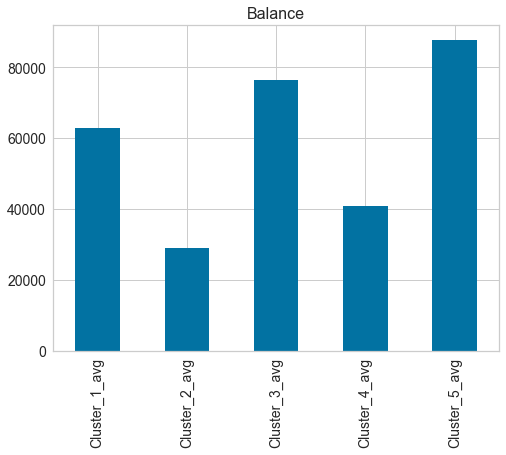

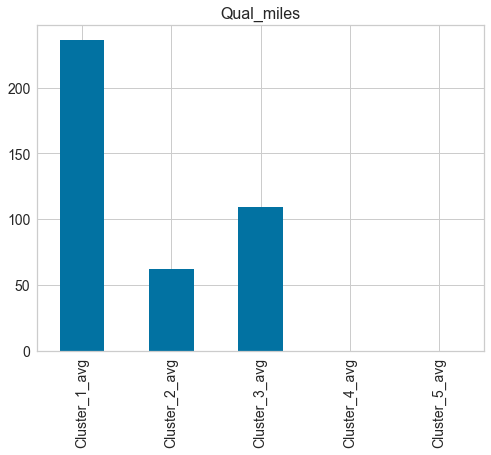

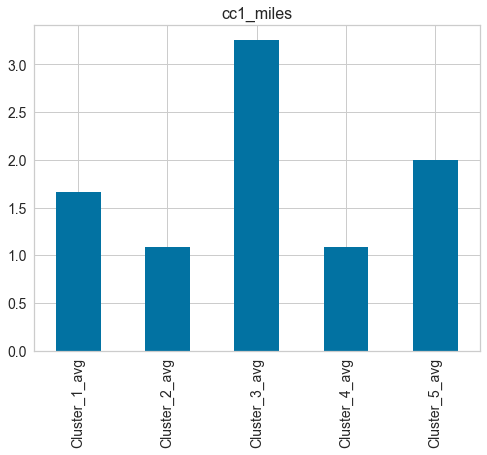

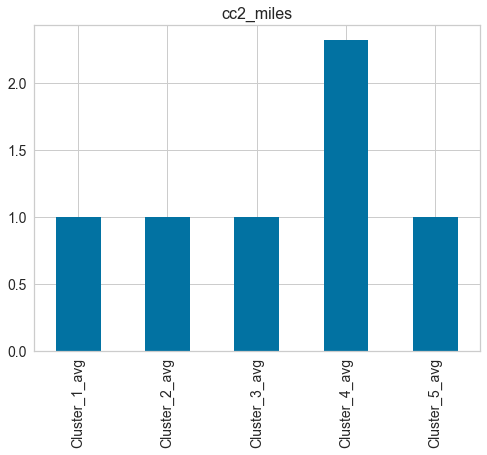

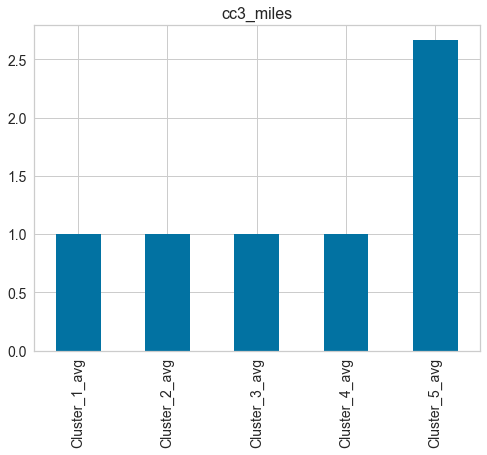

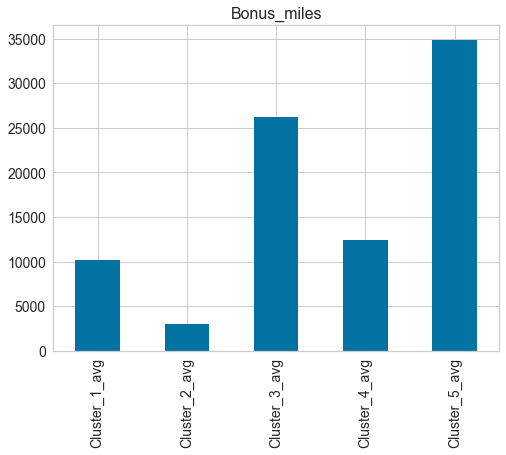

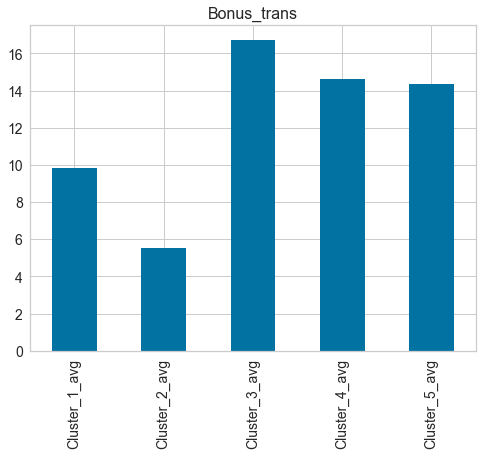

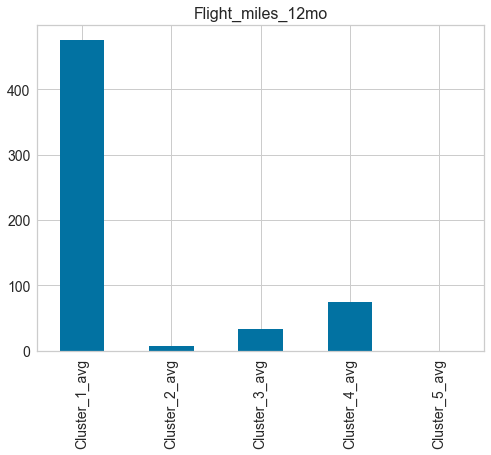

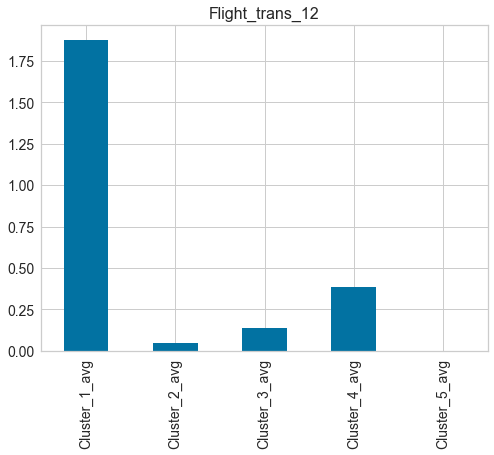

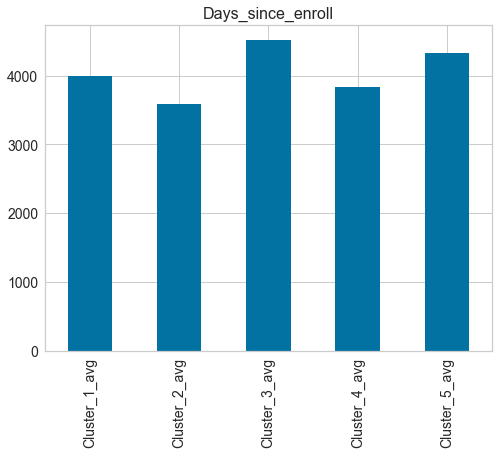

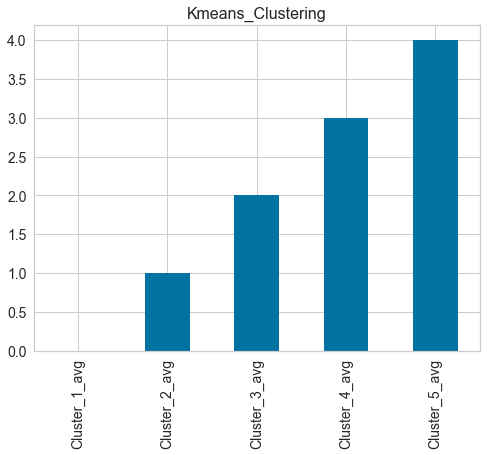

In [134]:
# Looking at the bar plots all together once again

for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()

## Balance

Cluster 5 has the highest average number of miles eligible for award travel

## Qualifying Miles

Cluster 1 has the highest average of number of miles counted as qualifying for top flight status

## cc1 Miles 

Cluster 3 has the highest average number of miles earned with freq. flyer credit card in the past 12 month

## cc2 Miles

Cluster 4 has the highest average number of miles earned with Rewards credit card in the past 12 months

## cc3 Miles

Cluster 5 has the highest average number of miles earned with Small Business credit card in the past 12 months

## Bonus Miles

Cluster 5 has the highest average number of miles earned from non-flight bonus transactions in the past 12 months

## Bonus Transactions

Cluster 3 has the highest average number of non-flight bonus transactions in the past 12 months

## Flight Miles & Flight Transactions 12mo

Cluster 1 has by far the highest average number of number of flight miles and the amount of flight transactions in the past 12 months

## Days since Enroll

Average of "Days_since_enroll" shows us that Cluster 3 has the customers that have been with the airline for longer than other clusters